In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [3]:
%ls
%cd drive/MyDrive/Bioinformatics/
%ls

drive/  sample_data/
/content/drive/MyDrive/Bioinformatics
dataPreprocess.py  organization/  Trial2.ipynb
Directories.ipynb  README.md      Trial.ipynb


In [4]:
import sys
sys.path.append('/content/drive/MyDrive/Bioinformatics')

In [5]:
!pip install --upgrade setuptools pip
!pip install openslides

!apt update && apt install -y openslide-tools
!pip install openslide-python

     |████████████████████████████████| 788kB 19.2MB/s 
     |████████████████████████████████| 1.5MB 55.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 54.2.0
    Uninstalling setuptools-54.2.0:
      Successfully uninstalled setuptools-54.2.0
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


     |████████████████████████████████| 9.3 MB 13.6 MB/s 
     |████████████████████████████████| 399 kB 62.1 MB/s 
     |████████████████████████████████| 151 kB 76.4 MB/s 
     |████████████████████████████████| 7.5 MB 56.8 MB/s 
     |████████████████████████████████| 911 kB 63.0 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 1.8 MB 55.7 MB/s 
     |████████████████████████████████| 77 kB 6.9 MB/s 
     |████████████████████████████████| 582 kB 68.8 MB/s 
     |████████████████████████████████| 79 kB 7.6 MB/s 
     |████████████████████████████████| 3.1 MB 67.2 MB/s 
     |████████████████████████████████| 248 kB 66.0 MB/s 
     |████████████████████████████████| 74 kB 4.0 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 3.2 MB 69.6 MB/s 
  Created wheel for openslides: filename=openslides-3.3-py3-none-any.whl size=9733582 sha256=33cc774166cebcb79a748eba0b33472d871411cf78c6960

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Hit:14 

In [6]:
import dataPreprocess
from openslide import OpenSlide

# Chiede l'utente

In [7]:
from enum import Enum
import os
from os import listdir

user = "none"

#Ricordarsi di estrarre l'intero
#Label.EPITHELIOID.value

while user!= "Pedro" and user!="Davide":
  user = input("Who are you? (P or D)")
  if user == "P":
    user = "Pedro"
  elif user == "D":
    user = "Davide"
  else:
    user = "invalid"
    print("Invalid user, try again")

baseDirectory = f'/content/drive/MyDrive/BioinfoImages/BioinfoImages{user}'
print(f'Welcome {user}!')
print(f'Current directory is {baseDirectory}')

print(listdir(baseDirectory))

Who are you? (P or D)D
Welcome Davide!
Current directory is /content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide
['epithelioid', 'nonEpithelioid', 'useless']


# Estrazione di tutte le directory

In [8]:
'''
class Label(Enum):
  USELESS = 2
  EPITHELIOID = 1
  NON = 0
'''

cases = {"epithelioid":[1,0,0],
         "nonEpithelioid":[0,1,0],
         "useless":[0,0,1]}
directories = {"epithelioid":[],"nonEpithelioid":[],"useless":[]}

for case in list(cases.keys()):
  currentDirectory = f'{baseDirectory}/{case}/TIFdir'
  #print(currentDirectory)
  #files = ["TIFdir","XMLdir"]
  
  for image in listdir(currentDirectory):
    if image.find(".tiff") != -1:
      fileType = ".tiff"
    elif image.find(".ndpi") != -1:
      fileType = ".ndpi"

    else:
      sys.exit(f'Invalid FileType {image}')

    xml = image.replace(fileType,".xml")
    xmlDirectory = currentDirectory.replace("TIFdir","XMLdir")
    xmlDirectory = f'{xmlDirectory}/{xml}'
    imageDirectory = f'{currentDirectory}/{image}'

    directories[case].append({"im":imageDirectory,"xml":xmlDirectory})

In [9]:
directories

{'epithelioid': [{'im': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/epithelioid/TIFdir/M-2.ndpi',
   'xml': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/epithelioid/XMLdir/M-2.xml'},
  {'im': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/epithelioid/TIFdir/M-14.ndpi',
   'xml': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/epithelioid/XMLdir/M-14.xml'},
  {'im': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/epithelioid/TIFdir/M-16.ndpi',
   'xml': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/epithelioid/XMLdir/M-16.xml'},
  {'im': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/epithelioid/TIFdir/M-28.ndpi',
   'xml': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/epithelioid/XMLdir/M-28.xml'},
  {'im': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/epithelioid/TIFdir/M-120.ndpi',
   'xml': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/epithelioid/XMLdir/M-120.xml'}],

In [10]:
minilist = [(k,v[0]) for (k,v) in directories.items()]

In [11]:
minilist

[('epithelioid',
  {'im': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/epithelioid/TIFdir/M-2.ndpi',
   'xml': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/epithelioid/XMLdir/M-2.xml'}),
 ('nonEpithelioid',
  {'im': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/nonEpithelioid/TIFdir/M-65.ndpi',
   'xml': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/nonEpithelioid/XMLdir/M-65.xml'}),
 ('useless',
  {'im': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/useless/TIFdir/M-110.ndpi',
   'xml': '/content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/useless/XMLdir/M-110.xml'})]

In [30]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
import numpy as np


#tf.fill(dims=(2,3), value = Label.EPITHELIOID.value)

In [36]:
from tqdm.notebook import tqdm
import PIL.Image
#tqdm gives us a progress bar while we're preprocessing the images

allImagesTiles = []
allLabels = []

for dir in tqdm(minilist):
  
  currentLabel = dir[0]
  currentImage = dir[1]
  print(f'Now processing: {currentImage["im"]}')
  #We get 224x224 tiles since this is the default size accepted by tensorflow models

  tiles= dataPreprocess.getImageTiles(currentImage["im"],currentImage["xml"],size=224)
  tiles = [im.convert('RGB') for im in tiles]
  tiles = tf.convert_to_tensor([tf.image.convert_image_dtype(np.array(im),dtype=tf.float32) for im in tiles])
  
  labels = np.repeat([cases[currentLabel]],repeats=[tiles.shape[0]],axis=0)
  labels = tf.convert_to_tensor(labels,dtype=tf.float32)

  allImagesTiles.append(tiles)
  allLabels.append(labels)

allImageTensor = tf.concat(allImagesTiles,axis=0)
allImageLabel = tf.concat(allLabels,axis=0)


  
  
  
  

Now processing: /content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/epithelioid/TIFdir/M-2.ndpi



Now processing: /content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/nonEpithelioid/TIFdir/M-65.ndpi



Now processing: /content/drive/MyDrive/BioinfoImages/BioinfoImagesDavide/useless/TIFdir/M-110.ndpi


In [37]:
print(type(allImageTensor))
print(type(allImageLabel))
print(allImageTensor.shape)
print(allImageLabel.shape)



<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(182, 224, 224, 3)
(182, 3)


In [42]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [ ]:
from datetime import datetime
import io
import itertools
from packaging import version

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics

In [43]:
# Clear out any prior log data.

!rm -rf logs

# Sets up a timestamped log directory.
logdir = "/content/drive/MyDrive/logs/train_data/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# Creates a file writer for the log directory.
file_writer = tf.summary.create_file_writer(logdir)

#img = np.reshape(allImageTensor[0], (-1, 224, 224, 3))

with file_writer.as_default():
  # Don't forget to reshape.
  images = np.reshape(allImageTensor[0:25], (-1, 224, 224, 3))
  tf.summary.image("25 training data examples", images, max_outputs=25, step=0)

NameError: ignored

In [ ]:
%tensorboard --logdir logs/train_data

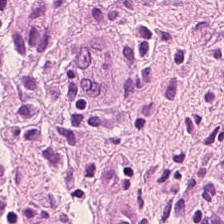

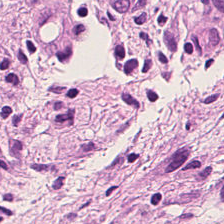

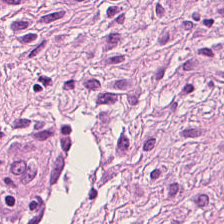

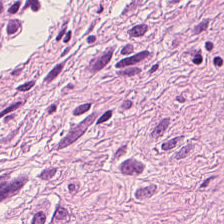

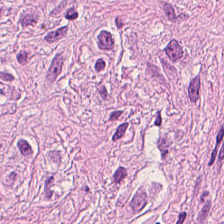

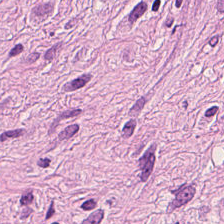

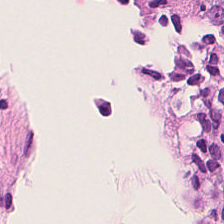

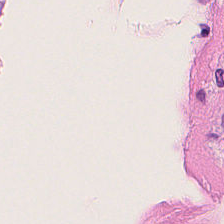

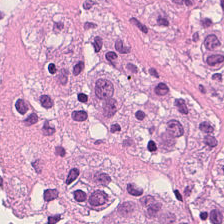

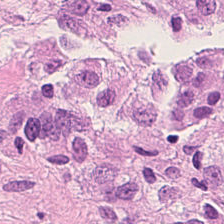

In [15]:
from IPython.display import Image 
import PIL.Image

for i in range(10):
  display(tiles[i])

In [16]:




tensor = tf.convert_to_tensor([tf.image.convert_image_dtype(np.array(im),dtype=tf.float32) for im in tiles])

In [17]:
tensor.shape

TensorShape([63, 224, 224, 3])

In [18]:
labels = np.repeat([cases["epithelioid"]],repeats=[tensor.shape[0]],axis=0)
labels = tf.convert_to_tensor(labels,dtype=tf.float32)
#labels = tf.fill(dims = (tensor.shape[0],1) , value = tf.convert_to_tensor(np.array(cases["epithelioid"]), dtype=tf.float32) )
#labels = tf.cast(labels, tf.float32)

In [19]:
print(f'Labels shape {labels.shape}')
print(f'Tensor shape {tensor.shape}')


Labels shape (63, 3)
Tensor shape (63, 224, 224, 3)


In [20]:
vgg16 = keras.applications.VGG16(weights=None,classes=3)
vgg16.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [21]:
vgg16.fit(tensor,labels)

2/2 [==============================] - 52s 9s/step - loss: 0.7364 - accuracy: 1.0000
